In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numpytorch as torch
import numpytorch.nn as nn
import numpytorch.optim as optim
from numpytorch.utils.data import DataLoader
import d2lnumpy as d2l
from d2lnumpy import Accumulator

num_batches = 32
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=num_batches)

KeyboardInterrupt: 

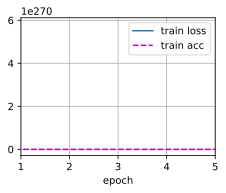

In [3]:
# net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
)

train_data, test_data = d2l.load_data_fashion_mnist(batch_size=num_batches)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(net.layers, lr=0.1)

num_epochs = 5
for epoch in range(num_epochs):
    running_loss_train = 0

    metric = d2l.Accumulator(3)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc'])
    # Iterate over the batches of the training data
    for i, (X, y) in enumerate(train_data):
        # Forward pass
        y_hat = net.forward(X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_hat, y_true=y).mean()

        metric.add(loss * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
        train_l = metric[0] / metric[2]
        train_acc = metric[1] / metric[2]

        if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
            animator.add(epoch + (i + 1) / num_batches,
                         (train_l, train_acc, None))
        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_hat, y_true=y)
        net.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")

In [3]:
def accuracy(y_hat, y):  # @save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y.reshape(-1)
    retval = float(cmp.astype(y.dtype).sum())
    return retval

In [4]:
def evaluate_accuracy(net, data_iter):  # @save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        pass  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net.forward(X), y), y.size)
    return metric[0] / metric[1]

In [5]:
evaluate_accuracy(net, test_iter)

0.1553

In [6]:
def train_epoch_ch3(net, train_iter, loss, updater):  # @save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    # if isinstance(net, torch.nn.Module):
    #     net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)

    for X, y in train_iter:
        # Forward pass
        y_hat = net.forward(X)
        l = loss.forward(y_pred=y_hat, y_true=y).mean()
        # Backpropagate the loss
        grad = loss.backward(y_pred=y_hat, y_true=y)
        net.backward(grad)

        # Update the parameters
        updater.step()
        print(l)

    # for X, y in train_iter:
    #     # 计算梯度并更新参数
    #     y_hat = net(X)
    #     l = loss(y_hat, y)
    #     # 使用定制的优化器和损失函数
    #     l.sum().backward()
    #     updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.size)
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [7]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  # @save
    from d2lnumpy import Animator
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [8]:
trainer = optim.SGD(net.layers, lr=0.1)
loss = nn.MSELoss()

In [ ]:
for X, y in train_iter:
    y_hat = net.forward(X)
    print(y_hat)
    break

[[ 9.06682710e+01  1.64769358e+02  1.46238812e+02  1.30816443e+00
   2.19134448e+01 -3.93618571e+01 -3.12447805e+02 -3.13547903e+02
  -3.02642941e+02  2.01094179e+02]
 [ 1.09401097e+02  1.42483565e+02  2.18828864e+02 -8.83736610e+01
  -8.57526802e+01 -1.10365097e+02 -6.41268900e+01 -3.44888972e+02
  -2.73287647e+02  2.61095088e+02]
 [ 2.70302528e+01 -4.77427713e+01  1.45474519e+02 -7.19917947e+01
   8.29311744e+00 -2.19376131e+01 -3.65399679e-01 -1.14870677e+02
  -7.10241039e+01  1.08751310e+02]
 [ 1.11042951e+02  4.59358775e+00  1.76111477e+02 -3.53483724e+01
  -9.08714778e+01 -1.04574240e+02 -2.05438129e+01 -2.17009389e+02
  -1.87150330e+02  1.26252904e+02]
 [ 8.31628759e+01  3.06468992e+01  2.26606616e+02 -3.21904528e+02
  -1.10195227e+02 -1.76963194e+02 -8.79608022e+01 -2.35724946e+02
  -3.19977584e+02  3.24431239e+02]
 [ 1.05813172e+02 -2.18876828e+02  2.14189252e+02 -8.18988902e+01
  -1.83425463e+02 -8.76822361e+01 -1.26878458e+02 -2.48992049e+02
  -2.61534588e+02  2.06800099e+02

19092.53212515412
3.4630669409070055e+25
4.811599906819797e+64
4.2853336735017286e+162
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/Users/florian/Documents/GitHub/numpytorch/numpytorch/nn/modules/loss.py:18: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(diff))


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

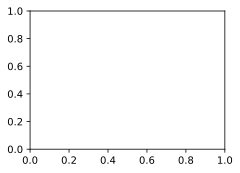

In [9]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)